Librerias utilizadas:

In [73]:
import pandas as pd
%pylab inline
import copy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import ensemble
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics
from keras import utils
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [0]:
url = 'https://raw.githubusercontent.com/diegoalvzfdez/master-data-science/master/preprocessed_data/csv_eye.csv'


## Estudio del Dataset Obtenido

Abrimos el fichero que hemos generado de los scripts anteriores

In [75]:
eye_df = pd.read_csv(url, sep = ";")
eye_df

,Max Depth Front,Max Depth Back,Max Curve Front,Max Curve Back,Max Variation Curve Front,Max Variation Curve Back,Mean Curve Front,Mean Curve Back,Age,K Max,Paqui Min,Distance Between Max Curve and Min Paqui,Position of Most Curve Point Relative to Center,Treatment
0,2590,2670,6.24,4.56,3.72,3.64,7.86,6.49,24,54.11,429,0.78,1.09,Pacientes tratados mediante anillos
1,2432,2449,6.35,4.62,3.41,3.44,7.86,6.51,24,53.18,425,0.54,0.96,Pacientes tratados mediante anillos
2,2833,2842,5.04,3.51,5.54,5.35,7.84,6.37,35,66.97,408,4.87,4.65,Pacientes tratados mediante anillos
3,3101,3124,5.26,3.62,5.10,4.91,7.93,6.44,35,64.18,372,5.50,4.88,Pacientes tratados mediante anillos
4,2435,2692,5.25,3.44,4.61,5.25,7.20,5.85,35,64.33,466,0.40,1.02,Pacientes tratados mediante anillos
5,2527,2641,6.61,4.82,2.47,2.88,8.17,6.61,20,51.06,473,0.61,0.40,Pacientes tratados mediante anillos
6,2614,2735,6.66,4.87,3.28,3.01,8.03,6.60,79,50.68,502,0.71,1.28,Pacientes tratados mediante anillos
7,2339,2542,6.37,3.84,2.78,4.63,7.90,6.24,49,52.97,398,0.50,0.15,Pacientes tratados mediante anillos
8,2695,2665,6.42,4.76,3.35,4.80,7.87,6.57,48,52.61,533,1.92,3.82,Pacientes tratados mediante anillos
9,2568,2742,5.33,3.25,3.66,4.47,7.51,6.14,75,63.37,414,0.28,0.33,Pacientes tratados mediante anillos


Como podemos ver existe correlación entre las elevaciones y las curvaturas máximas entre la cara anterior y posterior.

In [76]:
eye_df.corr()

,Max Depth Front,Max Depth Back,Max Curve Front,Max Curve Back,Max Variation Curve Front,Max Variation Curve Back,Mean Curve Front,Mean Curve Back,Age,K Max,Paqui Min,Distance Between Max Curve and Min Paqui,Position of Most Curve Point Relative to Center
Max Depth Front,1.000000,0.918769,0.148906,0.180076,-0.101847,-0.177493,-0.008407,0.015985,0.038626,-0.166420,0.007536,0.099422,0.130465
Max Depth Back,0.918769,1.000000,0.135230,0.146079,-0.076268,-0.140805,-0.028989,-0.052281,0.045135,-0.140972,-0.008846,0.137598,0.141763
Max Curve Front,0.148906,0.135230,1.000000,0.931793,-0.744736,-0.435254,0.539516,0.518290,0.160518,-0.983708,0.556916,0.020488,0.055171
Max Curve Back,0.180076,0.146079,0.931793,1.000000,-0.675757,-0.485264,0.483655,0.519664,0.129078,-0.909349,0.544147,0.073439,0.134985
Max Variation Curve Front,-0.101847,-0.076268,-0.744736,-0.675757,1.000000,0.438443,-0.169504,-0.189050,-0.033004,0.740876,-0.443434,0.340081,0.306191
Max Variation Curve Back,-0.177493,-0.140805,-0.435254,-0.485264,0.438443,1.000000,-0.148551,-0.031054,-0.015036,0.425902,-0.194438,0.131606,-0.000394
Mean Curve Front,-0.008407,-0.028989,0.539516,0.483655,-0.169504,-0.148551,1.000000,0.896174,-0.140134,-0.526604,0.360344,0.115398,0.135702
Mean Curve Back,0.015985,-0.052281,0.518290,0.519664,-0.189050,-0.031054,0.896174,1.000000,-0.023933,-0.505723,0.309405,0.108834,0.163733
Age,0.038626,0.045135,0.160518,0.129078,-0.033004,-0.015036,-0.140134,-0.023933,1.000000,-0.168898,0.070463,0.089815,0.101973
K Max,-0.166420,-0.140972,-0.983708,-0.909349,0.740876,0.425902,-0.526604,-0.505723,-0.168898,1.000000,-0.545111,-0.001841,-0.032807


Vamos a intentar reducir la correlación, cogiendo únicamente un valor máximo de los dos que poseemos.

In [77]:
eye_df['Max Depth'] = np.where(eye_df['Max Depth Front'] > eye_df['Max Depth Back'], eye_df['Max Depth Front'], eye_df['Max Depth Back'])
eye_df.drop(['Max Depth Front', 'Max Depth Back'], axis = 1, inplace = True)
eye_df.head(5)

,Max Curve Front,Max Curve Back,Max Variation Curve Front,Max Variation Curve Back,Mean Curve Front,Mean Curve Back,Age,K Max,Paqui Min,Distance Between Max Curve and Min Paqui,Position of Most Curve Point Relative to Center,Treatment,Max Depth
0,6.24,4.56,3.72,3.64,7.86,6.49,24,54.11,429,0.78,1.09,Pacientes tratados mediante anillos,2670
1,6.35,4.62,3.41,3.44,7.86,6.51,24,53.18,425,0.54,0.96,Pacientes tratados mediante anillos,2449
2,5.04,3.51,5.54,5.35,7.84,6.37,35,66.97,408,4.87,4.65,Pacientes tratados mediante anillos,2842
3,5.26,3.62,5.10,4.91,7.93,6.44,35,64.18,372,5.50,4.88,Pacientes tratados mediante anillos,3124
4,5.25,3.44,4.61,5.25,7.20,5.85,35,64.33,466,0.40,1.02,Pacientes tratados mediante anillos,2692


In [78]:
eye_df['Max Curve'] = np.where(eye_df['Max Curve Front'] < eye_df['Max Curve Back'], eye_df['Max Curve Front'], eye_df['Max Curve Back'])
eye_df.drop(['Max Curve Front', 'Max Curve Back'], axis = 1, inplace = True)
eye_df.head(5)

,Max Variation Curve Front,Max Variation Curve Back,Mean Curve Front,Mean Curve Back,Age,K Max,Paqui Min,Distance Between Max Curve and Min Paqui,Position of Most Curve Point Relative to Center,Treatment,Max Depth,Max Curve
0,3.72,3.64,7.86,6.49,24,54.11,429,0.78,1.09,Pacientes tratados mediante anillos,2670,4.56
1,3.41,3.44,7.86,6.51,24,53.18,425,0.54,0.96,Pacientes tratados mediante anillos,2449,4.62
2,5.54,5.35,7.84,6.37,35,66.97,408,4.87,4.65,Pacientes tratados mediante anillos,2842,3.51
3,5.10,4.91,7.93,6.44,35,64.18,372,5.50,4.88,Pacientes tratados mediante anillos,3124,3.62
4,4.61,5.25,7.20,5.85,35,64.33,466,0.40,1.02,Pacientes tratados mediante anillos,2692,3.44


Volvemos a comprobar la correlación entre las variables

In [79]:
eye_df.corr()

,Max Variation Curve Front,Max Variation Curve Back,Mean Curve Front,Mean Curve Back,Age,K Max,Paqui Min,Distance Between Max Curve and Min Paqui,Position of Most Curve Point Relative to Center,Max Depth,Max Curve
Max Variation Curve Front,1.000000,0.438443,-0.169504,-0.189050,-0.033004,0.740876,-0.443434,0.340081,0.306191,-0.050586,-0.675757
Max Variation Curve Back,0.438443,1.000000,-0.148551,-0.031054,-0.015036,0.425902,-0.194438,0.131606,-0.000394,-0.129462,-0.485264
Mean Curve Front,-0.169504,-0.148551,1.000000,0.896174,-0.140134,-0.526604,0.360344,0.115398,0.135702,-0.030029,0.483655
Mean Curve Back,-0.189050,-0.031054,0.896174,1.000000,-0.023933,-0.505723,0.309405,0.108834,0.163733,-0.049156,0.519664
Age,-0.033004,-0.015036,-0.140134,-0.023933,1.000000,-0.168898,0.070463,0.089815,0.101973,0.047569,0.129078
K Max,0.740876,0.425902,-0.526604,-0.505723,-0.168898,1.000000,-0.545111,-0.001841,-0.032807,-0.130900,-0.909349
Paqui Min,-0.443434,-0.194438,0.360344,0.309405,0.070463,-0.545111,1.000000,-0.013823,0.009084,-0.008025,0.544147
Distance Between Max Curve and Min Paqui,0.340081,0.131606,0.115398,0.108834,0.089815,-0.001841,-0.013823,1.000000,0.886387,0.158610,0.073439
Position of Most Curve Point Relative to Center,0.306191,-0.000394,0.135702,0.163733,0.101973,-0.032807,0.009084,0.886387,1.000000,0.162860,0.134985
Max Depth,-0.050586,-0.129462,-0.030029,-0.049156,0.047569,-0.130900,-0.008025,0.158610,0.162860,1.000000,0.137536


Podemos ver que hay una gran correlación entre las curvaturas y la k max

Vamos a sacar la máxima variación total de curvatura igual que en los procedimientos anteriores, para reducir el número de parámetros

In [80]:
eye_df['Max Variation Curve'] = np.where(eye_df['Max Variation Curve Front'] > eye_df['Max Variation Curve Back'], eye_df['Max Variation Curve Front'], eye_df['Max Variation Curve Back'])
eye_df.drop(['Max Variation Curve Front', 'Max Variation Curve Back'], axis = 1, inplace = True)
eye_df.head(5)

,Mean Curve Front,Mean Curve Back,Age,K Max,Paqui Min,Distance Between Max Curve and Min Paqui,Position of Most Curve Point Relative to Center,Treatment,Max Depth,Max Curve,Max Variation Curve
0,7.86,6.49,24,54.11,429,0.78,1.09,Pacientes tratados mediante anillos,2670,4.56,3.72
1,7.86,6.51,24,53.18,425,0.54,0.96,Pacientes tratados mediante anillos,2449,4.62,3.44
2,7.84,6.37,35,66.97,408,4.87,4.65,Pacientes tratados mediante anillos,2842,3.51,5.54
3,7.93,6.44,35,64.18,372,5.50,4.88,Pacientes tratados mediante anillos,3124,3.62,5.10
4,7.20,5.85,35,64.33,466,0.40,1.02,Pacientes tratados mediante anillos,2692,3.44,5.25


In [81]:
eye_df.corr()

,Mean Curve Front,Mean Curve Back,Age,K Max,Paqui Min,Distance Between Max Curve and Min Paqui,Position of Most Curve Point Relative to Center,Max Depth,Max Curve,Max Variation Curve
Mean Curve Front,1.000000,0.896174,-0.140134,-0.526604,0.360344,0.115398,0.135702,-0.030029,0.483655,-0.160306
Mean Curve Back,0.896174,1.000000,-0.023933,-0.505723,0.309405,0.108834,0.163733,-0.049156,0.519664,-0.057291
Age,-0.140134,-0.023933,1.000000,-0.168898,0.070463,0.089815,0.101973,0.047569,0.129078,0.011298
K Max,-0.526604,-0.505723,-0.168898,1.000000,-0.545111,-0.001841,-0.032807,-0.130900,-0.909349,0.435817
Paqui Min,0.360344,0.309405,0.070463,-0.545111,1.000000,-0.013823,0.009084,-0.008025,0.544147,-0.211920
Distance Between Max Curve and Min Paqui,0.115398,0.108834,0.089815,-0.001841,-0.013823,1.000000,0.886387,0.158610,0.073439,0.234977
Position of Most Curve Point Relative to Center,0.135702,0.163733,0.101973,-0.032807,0.009084,0.886387,1.000000,0.162860,0.134985,0.103506
Max Depth,-0.030029,-0.049156,0.047569,-0.130900,-0.008025,0.158610,0.162860,1.000000,0.137536,-0.112890
Max Curve,0.483655,0.519664,0.129078,-0.909349,0.544147,0.073439,0.134985,0.137536,1.000000,-0.472522
Max Variation Curve,-0.160306,-0.057291,0.011298,0.435817,-0.211920,0.234977,0.103506,-0.112890,-0.472522,1.000000


Vemos que obtenemos una gran correlación entre las medias de las curvaturas, por lo que tambien vamos a unificar las medias de las curvaturas

In [82]:
eye_df['Mean Curve'] = np.where(eye_df['Mean Curve Front'] < eye_df['Mean Curve Back'], eye_df['Mean Curve Front'], eye_df['Mean Curve Back'])
eye_df.drop(['Mean Curve Front', 'Mean Curve Back'], axis = 1, inplace = True)
eye_df.head(5)

,Age,K Max,Paqui Min,Distance Between Max Curve and Min Paqui,Position of Most Curve Point Relative to Center,Treatment,Max Depth,Max Curve,Max Variation Curve,Mean Curve
0,24,54.11,429,0.78,1.09,Pacientes tratados mediante anillos,2670,4.56,3.72,6.49
1,24,53.18,425,0.54,0.96,Pacientes tratados mediante anillos,2449,4.62,3.44,6.51
2,35,66.97,408,4.87,4.65,Pacientes tratados mediante anillos,2842,3.51,5.54,6.37
3,35,64.18,372,5.50,4.88,Pacientes tratados mediante anillos,3124,3.62,5.10,6.44
4,35,64.33,466,0.40,1.02,Pacientes tratados mediante anillos,2692,3.44,5.25,5.85


In [83]:
eye_df.corr()

,Age,K Max,Paqui Min,Distance Between Max Curve and Min Paqui,Position of Most Curve Point Relative to Center,Max Depth,Max Curve,Max Variation Curve,Mean Curve
Age,1.000000,-0.168898,0.070463,0.089815,0.101973,0.047569,0.129078,0.011298,-0.023933
K Max,-0.168898,1.000000,-0.545111,-0.001841,-0.032807,-0.130900,-0.909349,0.435817,-0.505723
Paqui Min,0.070463,-0.545111,1.000000,-0.013823,0.009084,-0.008025,0.544147,-0.211920,0.309405
Distance Between Max Curve and Min Paqui,0.089815,-0.001841,-0.013823,1.000000,0.886387,0.158610,0.073439,0.234977,0.108834
Position of Most Curve Point Relative to Center,0.101973,-0.032807,0.009084,0.886387,1.000000,0.162860,0.134985,0.103506,0.163733
Max Depth,0.047569,-0.130900,-0.008025,0.158610,0.162860,1.000000,0.137536,-0.112890,-0.049156
Max Curve,0.129078,-0.909349,0.544147,0.073439,0.134985,0.137536,1.000000,-0.472522,0.519664
Max Variation Curve,0.011298,0.435817,-0.211920,0.234977,0.103506,-0.112890,-0.472522,1.000000,-0.057291
Mean Curve,-0.023933,-0.505723,0.309405,0.108834,0.163733,-0.049156,0.519664,-0.057291,1.000000


Como estos valores están sacados del Pentacam, la máquina que nos permite obtener los mapas paquimétricos, de elevación y de curvatura , empleando un describe podemos ver si tenemos algún dato máximo o mínimo que no se ajusten a un ojo real. En este caso, con ayuda de un especialista en óptica, podemos ver que no tenemos ningún dato fuera de la normalidad.

In [84]:
eye_df.describe()

,Age,K Max,Paqui Min,Distance Between Max Curve and Min Paqui,Position of Most Curve Point Relative to Center,Max Depth,Max Curve,Max Variation Curve,Mean Curve
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,42.121475,53.808872,468.449024,1.503449,1.687657,2851.835141,4.670954,3.552560,6.414816
std,13.967758,6.350378,46.357544,1.362391,1.396684,381.546964,0.693313,1.963347,0.282299
min,15.000000,42.730000,297.000000,0.100000,0.060000,1854.000000,2.420000,1.290000,5.240000
25%,31.000000,49.190000,435.000000,0.760000,0.780000,2622.000000,4.190000,2.710000,6.230000
50%,42.000000,52.490000,472.000000,1.080000,1.250000,2807.000000,4.750000,3.240000,6.420000
75%,50.000000,56.930000,498.000000,1.490000,2.070000,3003.000000,5.180000,4.000000,6.610000
max,95.000000,88.100000,617.000000,6.930000,6.900000,4787.000000,6.360000,31.000000,7.160000


Vamos a comprobar el numero de muestras que poseemos de cada una de las etiquetas

In [85]:
eye_df.groupby(['Treatment'])['Treatment'].count()

Treatment
Pacientes sin operar                        230
Pacientes tratados mediante anillos         169
Pacientes tratados mediante crosslinking     62
Name: Treatment, dtype: int64

## Modelado

Como podemos ver, tenemos el dataset bastante desbalanceado, siendo el número de pacientes sin tratar mayor que el numero de pacientes tratados mediante anillos y mediante crosslinking.

Vamos a intentar, en primera instancia, crear un clasificador capaz de detectar si un paciente se le debe operar o no, por lo que debemos crear una nueva columna

In [0]:
eye_df_cl_1 = copy.deepcopy(eye_df)

In [210]:
eye_df_cl_1['Operated'] = np.where(eye_df_cl_1['Treatment'] == 'Pacientes sin operar', 'No', 'Yes')
eye_df_cl_1['Operated Binary'] = np.where(eye_df_cl_1['Treatment'] == 'Pacientes sin operar', 0, 1)
eye_df_cl_1.head(5)

,Age,K Max,Paqui Min,Distance Between Max Curve and Min Paqui,Position of Most Curve Point Relative to Center,Treatment,Max Depth,Max Curve,Max Variation Curve,Mean Curve,Operated,Operated Binary
0,24,54.11,429,0.78,1.09,Pacientes tratados mediante anillos,2670,4.56,3.72,6.49,Yes,1
1,24,53.18,425,0.54,0.96,Pacientes tratados mediante anillos,2449,4.62,3.44,6.51,Yes,1
2,35,66.97,408,4.87,4.65,Pacientes tratados mediante anillos,2842,3.51,5.54,6.37,Yes,1
3,35,64.18,372,5.50,4.88,Pacientes tratados mediante anillos,3124,3.62,5.10,6.44,Yes,1
4,35,64.33,466,0.40,1.02,Pacientes tratados mediante anillos,2692,3.44,5.25,5.85,Yes,1


Como podemos ver, en este caso tenemos el dataset mucho más balaceado que en el caso anterior, por lo que se convierte en un buen inicio para probar clasificadores

In [88]:
eye_df_cl_1.groupby(['Operated'])['Operated'].count()

Operated
No     230
Yes    231
Name: Operated, dtype: int64

Para probar los modelos, creamos los vectores x e y que nos permitirán entrenarlos

In [0]:
x = eye_df_cl_1[['Max Depth', 'Max Curve', 'Max Variation Curve', 'Mean Curve', 'Age', 'K Max', 'Paqui Min', 'Distance Between Max Curve and Min Paqui', 'Position of Most Curve Point Relative to Center']]
y = eye_df_cl_1['Operated']
y_dl = eye_df_cl_1['Operated Binary']

### Regresión Logística

Vamos a comenzar con una regresión logistica

In [0]:
clf = LogisticRegression()

Para probar los clasificadores, vamos a emplear una validación cruzada. Vamos a utilizar la siguiente función para valorar mediante la función classification_report los resultados obtenidos mediante la validación cruzada. Esta función la introduciremos dentro de un make_scorer.

In [0]:
def classification_report_with_accuracy_score(y_true, y_pred):

    print (classification_report(y_true, y_pred))
    return accuracy_score(y_true, y_pred)

Vamos a emplear esta función obtenida de Scikit Learn para pintar la matriz de confusión

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color= "black")
    fig.tight_layout()
    return ax

Como podemos comprobar, tenemos un accuracy medio en las 10 iteraciones de un 73 %.

In [93]:
cross_val_score(clf, x, y, cv=10, scoring = make_scorer(classification_report_with_accuracy_score)).mean()

              precision    recall  f1-score   support

          No       0.68      0.83      0.75        23
         Yes       0.79      0.62      0.70        24

    accuracy                           0.72        47
   macro avg       0.73      0.73      0.72        47
weighted avg       0.74      0.72      0.72        47

              precision    recall  f1-score   support

          No       0.79      0.65      0.71        23
         Yes       0.70      0.83      0.76        23

    accuracy                           0.74        46
   macro avg       0.75      0.74      0.74        46
weighted avg       0.75      0.74      0.74        46

              precision    recall  f1-score   support

          No       0.76      0.83      0.79        23
         Yes       0.81      0.74      0.77        23

    accuracy                           0.78        46
   macro avg       0.78      0.78      0.78        46
weighted avg       0.78      0.78      0.78        46

              preci

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

0.731036077705828

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [184]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Confusion matrix, without normalization
[[59 16]
 [16 48]]


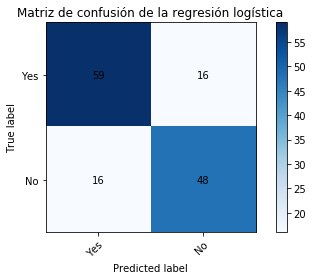

In [188]:
y_pred_log_reg=clf.predict(X_test)
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
classes = ['Yes', 'No']
plot_confusion_matrix(y_test, y_pred_log_reg, classes=classes, title='Matriz de confusión de la regresión logística')

In [189]:
print (classification_report(y_test, y_pred_log_reg, target_names=classes))
print (accuracy_score(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

         Yes       0.79      0.79      0.79        75
          No       0.75      0.75      0.75        64

    accuracy                           0.77       139
   macro avg       0.77      0.77      0.77       139
weighted avg       0.77      0.77      0.77       139

0.7697841726618705


### K Nearest Neighbors

Una vez probada la regresión logística, vamos a probar a implementar un k nearest neighbors. Para este caso, para encontrar los hiperparámetros más óptimos, vamos a emplear un gridsearch. Vamos a utilizar un número de vecinos bajo ya que el número de muestras de nuestro dataset es bajo.

In [0]:
clf_kn = GridSearchCV(KNeighborsClassifier(),
                  param_grid={"n_neighbors":np.arange(2, 20)},
                  cv=5,
                  scoring='accuracy')

In [106]:
clf_kn.fit(x, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Como podemos ver, para este caso los k nearest neighbors no funcionan tan bien como el modelo anterior, obteniendo un accuracy máximo de 61%, lo cual es inferior al 73 % de la regresión logística. 

In [107]:
clf_kn.best_score_

0.613882863340564

In [108]:
clf_kn.best_params_

{'n_neighbors': 9}

In [109]:
clf_kn.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Confusion matrix, without normalization
[[48 25]
 [23 43]]


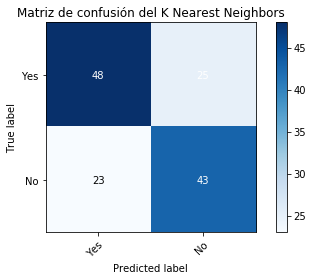

In [115]:
y_pred_kn=clf_kn.best_estimator_.predict(X_test)
classes = ['Yes', 'No']
plot_confusion_matrix(y_test, y_pred_kn, classes=classes, title='Matriz de confusión del K Nearest Neighbors')

In [114]:
print (classification_report(y_test, y_pred_kn, target_names=classes))
print (accuracy_score(y_test, y_pred_kn))

              precision    recall  f1-score   support

         Yes       0.68      0.66      0.67        73
          No       0.63      0.65      0.64        66

    accuracy                           0.65       139
   macro avg       0.65      0.65      0.65       139
weighted avg       0.66      0.65      0.65       139

0.6546762589928058


### SVM

El siguiente paso es probar con un Support Vector Machine. Vamos a comprobar los distintos tipos que existen de este clasificador para comprobar si alguno de estos se puede ajustar más al dataset que tenemos. En primer lugar vamos a probar con un kernel linear, empleando un gridsearch para encontrar el mejor hiperparámetro. Obtenemos un resultado parecido a la regresión logística, con aproximadamente un 74 % de accuracy.

In [0]:
clf_svml = GridSearchCV(SVC(kernel="linear",),
                  param_grid={"C":[1,10,100,1000,10000]},
                  cv=10,
                  scoring="accuracy")

In [117]:
clf_svml.fit(x, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [118]:
clf_svml.best_score_

0.7396963123644251

In [119]:
clf_svml.best_params_

{'C': 1000}

In [120]:
clf_svml.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Confusion matrix, without normalization
[[50 23]
 [17 49]]


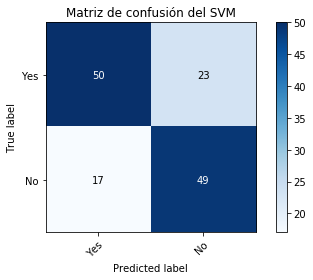

In [121]:
y_pred_svm=clf_svml.best_estimator_.predict(X_test)
classes = ['Yes', 'No']
plot_confusion_matrix(y_test, y_pred_svm, classes=classes, title='Matriz de confusión del SVM')

In [122]:
print (classification_report(y_test, y_pred_svm, target_names=classes))
print (accuracy_score(y_test, y_pred_svm))

              precision    recall  f1-score   support

         Yes       0.75      0.68      0.71        73
          No       0.68      0.74      0.71        66

    accuracy                           0.71       139
   macro avg       0.71      0.71      0.71       139
weighted avg       0.72      0.71      0.71       139

0.7122302158273381


### Decision Tree

Una vez comprobados los SVM, vamos a comprobar los árboles de decisión. Como podemos observar, mediante el árbol de decisión no somos capaces de conseguir más accuracy comparado con la regresión logística.

In [0]:
clf_dt = GridSearchCV(DecisionTreeClassifier(),
                      param_grid={"min_samples_leaf":np.arange(1,100),
                                 'max_depth': np.arange(2, 20)},
                     cv = 10,
                     scoring = "accuracy")

In [132]:
clf_dt.fit(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn',...
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22

In [137]:
clf_dt.best_params_

{'max_depth': 7, 'min_samples_leaf': 13}

In [126]:
clf_dt.best_score_

0.702819956616052

In [128]:
clf_dt.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn',...
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22

Confusion matrix, without normalization
[[48 25]
 [25 41]]


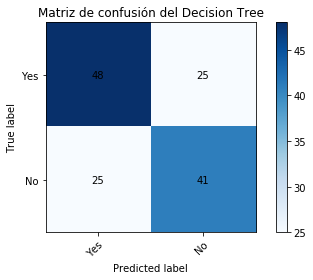

In [135]:
clf_dt_test = DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 13)
clf_dt_test.fit(X_train, y_train)
y_pred_dt=clf_dt_test.predict(X_test)
classes = ['Yes', 'No']
plot_confusion_matrix(y_test, y_pred_dt, classes=classes, title='Matriz de confusión del Decision Tree')

In [136]:
print (classification_report(y_test, y_pred_dt, target_names=classes))
print (accuracy_score(y_test, y_pred_dt))

              precision    recall  f1-score   support

         Yes       0.66      0.66      0.66        73
          No       0.62      0.62      0.62        66

    accuracy                           0.64       139
   macro avg       0.64      0.64      0.64       139
weighted avg       0.64      0.64      0.64       139

0.6402877697841727


### Random Forest

Vamos a intentar implementar un Random Forest. Como hemos podido ver, heredando el valor de min_samples_leaf del árbol de decisión, hemos conseguido mejorar el accuracy hasta un 76.57%

In [0]:
clf_rf = GridSearchCV(RandomForestClassifier(),
                      param_grid = {'min_samples_leaf': np.arange(1,20,2),
                                    'n_estimators': np.arange(20,300, 20),
                                    'max_depth': np.arange(2,10)
                      },
                      cv = 5,
                      scoring = 'accuracy',
                      n_jobs = -1)

In [154]:
clf_rf.fit(x, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [155]:
clf_rf.best_score_

0.7613882863340564

In [156]:
clf_rf.best_params_

{'max_depth': 7, 'min_samples_leaf': 1, 'n_estimators': 140}

In [0]:
clf_rf_good = clf_rf.best_estimator_

Mediante el método feature_importances_ podemos ver cómo influyen cada una de las variables a la decisión tomada por el Random Forest, siendo la más importante la máxima variación de la curvatura y la menos importante la media de las curvaturas.

In [159]:
clf_rf_good.feature_importances_

array([0.1078405 , 0.11441745, 0.17603685, 0.04377307, 0.16115489,
       0.17603678, 0.08121399, 0.08692425, 0.05260224])

In [160]:
x.columns

Index(['Max Depth', 'Max Curve', 'Max Variation Curve', 'Mean Curve', 'Age',
       'K Max', 'Paqui Min', 'Distance Between Max Curve and Min Paqui',
       'Position of Most Curve Point Relative to Center'],
      dtype='object')

Vamos a  hacer una prueba eliminando las columnas menos influyentes, para comprobar como se comporta el Random Forest, y como podemos comprobar, eliminando la media de las curvaturas, podemos subir a un 76% el accuracy.

In [0]:
x_upgrade = eye_df_cl_1[['Max Depth', 'Max Curve', 'Max Variation Curve', 'Age', 'K Max', 'Paqui Min', 'Distance Between Max Curve and Min Paqui', 'Position of Most Curve Point Relative to Center']]

In [162]:
clf_rf.fit(x_upgrade, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [163]:
clf_rf.best_params_

{'max_depth': 9, 'min_samples_leaf': 1, 'n_estimators': 180}

In [164]:
clf_rf.best_score_

0.7657266811279827

Vamos a intentar volver a iterar eliminando un parámetro más que no sea determinante para el predictor. Como podemos ver, en este caso el parámetro menos influyente es la posición del punto más curvo con respecto al centro. En este caso, perdemos accuracy a pesar de quitar un parámetro poco influyente, por lo que vamos a mantener el vector x anterior.

In [0]:
clf_rf_good = clf_rf.best_estimator_

In [166]:
clf_rf_good.feature_importances_

array([0.12127613, 0.11774145, 0.17263985, 0.15211056, 0.16140923,
       0.104629  , 0.09725746, 0.07293632])

In [167]:
x_upgrade.columns

Index(['Max Depth', 'Max Curve', 'Max Variation Curve', 'Age', 'K Max',
       'Paqui Min', 'Distance Between Max Curve and Min Paqui',
       'Position of Most Curve Point Relative to Center'],
      dtype='object')

In [0]:
x_upgrade_2 = eye_df_cl_1[['Max Depth', 'Max Curve', 'Max Variation Curve', 'Age', 'K Max', 'Paqui Min', 'Distance Between Max Curve and Min Paqui']]

In [169]:
clf_rf.fit(x_upgrade_2, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [170]:
clf_rf.best_score_

0.7613882863340564

In [171]:
clf_rf.best_params_

{'max_depth': 9, 'min_samples_leaf': 3, 'n_estimators': 200}

In [0]:
X_train_upgrade, X_test_upgrade, y_train_upgrade, y_test_upgrade = train_test_split(x_upgrade, y, test_size=0.2)

Confusion matrix, without normalization
[[40 16]
 [ 6 31]]


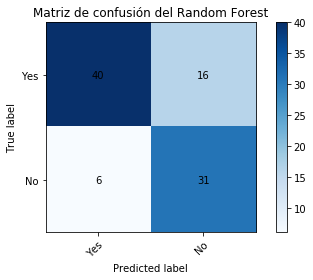

In [191]:
clf_rf_test = RandomForestClassifier(n_estimators = 180, max_depth = 9, min_samples_leaf = 1)
clf_rf_test.fit(X_train_upgrade, y_train_upgrade)
y_pred_rf=clf_rf_test.predict(X_test_upgrade)
classes = ['Yes', 'No']
plot_confusion_matrix(y_test_upgrade, y_pred_rf, classes=classes, title='Matriz de confusión del Random Forest')

In [192]:
print (classification_report(y_test_upgrade, y_pred_rf, target_names=classes))
print (accuracy_score(y_test_upgrade, y_pred_rf))

              precision    recall  f1-score   support

         Yes       0.87      0.71      0.78        56
          No       0.66      0.84      0.74        37

    accuracy                           0.76        93
   macro avg       0.76      0.78      0.76        93
weighted avg       0.79      0.76      0.77        93

0.7634408602150538


### XGBoost

Para el siguiente paso vamos a comprobar la eficacia de un xgboost en nuestro sistema. Como podemos ver se comporta de manera parecida al Random Forest, obteniendo resultados del 76 % de aciertos.

In [0]:
clf_xg = GridSearchCV(XGBClassifier(),
                      param_grid = {'max_depth': np.arange(2,10),
                                   "learning_rate": np.arange(0.04, 0.32, 0.04),
                                   "n_estimators": np.arange(100, 150, 10)},
                      cv = 10,
                      scoring = 'accuracy',
                      n_jobs = -1
         )

In [195]:
clf_xg.fit(x_upgrade, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': array([0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32]),
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])

In [196]:
clf_xg.best_params_

{'learning_rate': 0.16, 'max_depth': 2, 'n_estimators': 130}

In [197]:
clf_xg.best_score_

0.7657266811279827

Confusion matrix, without normalization
[[39 17]
 [ 9 28]]


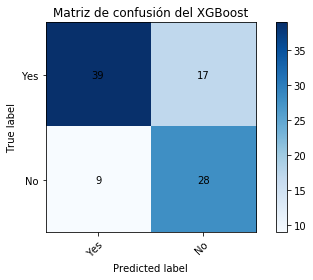

In [198]:
clf_xgb_test = XGBClassifier(learning_rate = 0.16, max_depth = 2, n_estimators = 130)
clf_xgb_test.fit(X_train_upgrade, y_train_upgrade)
y_pred_xgb=clf_xgb_test.predict(X_test_upgrade)
classes = ['Yes', 'No']
plot_confusion_matrix(y_test_upgrade, y_pred_xgb, classes=classes, title='Matriz de confusión del XGBoost')

In [199]:
print (classification_report(y_test_upgrade, y_pred_xgb, target_names=classes))
print (accuracy_score(y_test_upgrade, y_pred_xgb))

              precision    recall  f1-score   support

         Yes       0.81      0.70      0.75        56
          No       0.62      0.76      0.68        37

    accuracy                           0.72        93
   macro avg       0.72      0.73      0.72        93
weighted avg       0.74      0.72      0.72        93

0.7204301075268817


### Gradient Boosted Trees

Para el siguiente caso vamos a utilizar un Gradient Boosted Tree, de la libreria de Scikit Learn. Como podemos ver, el resultado obtenido no supera a los resultados del XGBoost, por lo que nuestro mejor resultado sigue siendo el 76.57 %.



In [0]:
clf_gbt = GridSearchCV(ensemble.GradientBoostingClassifier(),
                      param_grid = {'max_depth': np.arange(2,10),
                                   "n_estimators": np.arange(1000, 2000, 200),
                                   "max_leaf_nodes": np.arange(2, 6, 1),
                                   "min_samples_leaf": np.arange(2, 6, 1)},
                      cv = 5,
                      scoring = 'accuracy',
         )

In [275]:
clf_gbt.fit(x_upgrade, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no...
                                                  subsample=1.0, tol

In [276]:
clf_gbt.best_params_

{'max_depth': 3,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 3,
 'n_estimators': 1200}

In [277]:
clf_gbt.best_score_

0.7223427331887202

### Ensamblaje de modelos

Una vez que tenemos ya una buena serie de modelos creados, y con sus métricas establecidas, vamos a intentar combinarlos para conseguir obtener mejores resultados. En primera instancia vamos a intentar crear un VottingClassifier para intentar combinar los dos clasificadores que nos dieron mejores resultados. Como podemos ver, si juntamos el Gradient Boosted Tree con el XGBoost (el mejor clasificador hasta ahora), no obtenemos mejores resultados que con el Random Forest solo.

In [278]:
clf_xg.best_params_

{'learning_rate': 0.16, 'max_depth': 2, 'n_estimators': 130}

In [279]:
clf_gbt.best_params_

{'max_depth': 3,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 3,
 'n_estimators': 1200}

In [0]:
clf_votting = VotingClassifier(estimators=[('xgboost', XGBClassifier(learning_rate = 0.16, max_depth = 2, n_estimators = 130)), 
                                           ('gbt', ensemble.GradientBoostingClassifier(max_depth = 3, max_leaf_nodes = 5, min_samples_leaf = 3, n_estimators = 1200))])

In [281]:
#para entrenar al sistema utilizaremos una validación cruzada

cross_val_score(clf_votting, x_upgrade, y, cv = 10, scoring = make_scorer(classification_report_with_accuracy_score)).mean()

              precision    recall  f1-score   support

          No       0.67      0.87      0.75        23
         Yes       0.82      0.58      0.68        24

    accuracy                           0.72        47
   macro avg       0.75      0.73      0.72        47
weighted avg       0.75      0.72      0.72        47

              precision    recall  f1-score   support

          No       0.71      0.74      0.72        23
         Yes       0.73      0.70      0.71        23

    accuracy                           0.72        46
   macro avg       0.72      0.72      0.72        46
weighted avg       0.72      0.72      0.72        46

              precision    recall  f1-score   support

          No       0.77      0.87      0.82        23
         Yes       0.85      0.74      0.79        23

    accuracy                           0.80        46
   macro avg       0.81      0.80      0.80        46
weighted avg       0.81      0.80      0.80        46

              preci

0.7440795559666975

Confusion matrix, without normalization
[[41 15]
 [12 25]]


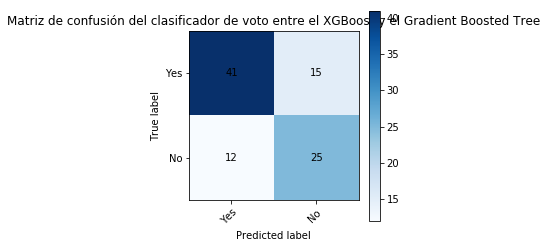

In [282]:
clf_votting.fit(X_train_upgrade, y_train_upgrade)
y_pred_vot=clf_votting.predict(X_test_upgrade)
classes = ['Yes', 'No']
plot_confusion_matrix(y_test_upgrade, y_pred_vot, classes=classes, title='Matriz de confusión del clasificador de voto entre el XGBoost y el Gradient Boosted Tree')

In [283]:
print (classification_report(y_test_upgrade, y_pred_vot, target_names=classes))
print (accuracy_score(y_test_upgrade, y_pred_vot))

              precision    recall  f1-score   support

         Yes       0.77      0.73      0.75        56
          No       0.62      0.68      0.65        37

    accuracy                           0.71        93
   macro avg       0.70      0.70      0.70        93
weighted avg       0.71      0.71      0.71        93

0.7096774193548387


Si por otro lado juntamos el mejor clasificador que hemos obtenido, el XGBoost, con el Random Forest, podemos ver que mejoramos los resultados con el intento anterior, pero no llegamos a superar los resultados obtenidos con el XGBoost por separado.

In [0]:
clf_rf.best_params_

{'max_depth': 8, 'n_estimators': 220}

In [0]:
clf_votting_v2 = VotingClassifier(estimators=[('xgboost', XGBClassifier(learning_rate = 0.16, max_depth = 2, n_estimators = 130)), 
                                           ('rf', RandomForestClassifier(min_samples_leaf = 1, max_depth = 9, n_estimators = 180))])

In [201]:
cross_val_score(clf_votting_v2, x_upgrade, y, cv = 10, scoring = make_scorer(classification_report_with_accuracy_score)).mean()

              precision    recall  f1-score   support

          No       0.71      0.87      0.78        23
         Yes       0.84      0.67      0.74        24

    accuracy                           0.77        47
   macro avg       0.78      0.77      0.76        47
weighted avg       0.78      0.77      0.76        47

              precision    recall  f1-score   support

          No       0.73      0.70      0.71        23
         Yes       0.71      0.74      0.72        23

    accuracy                           0.72        46
   macro avg       0.72      0.72      0.72        46
weighted avg       0.72      0.72      0.72        46

              precision    recall  f1-score   support

          No       0.78      0.91      0.84        23
         Yes       0.89      0.74      0.81        23

    accuracy                           0.83        46
   macro avg       0.84      0.83      0.82        46
weighted avg       0.84      0.83      0.82        46

              preci

0.7461609620721554

Confusion matrix, without normalization
[[41 15]
 [ 9 28]]


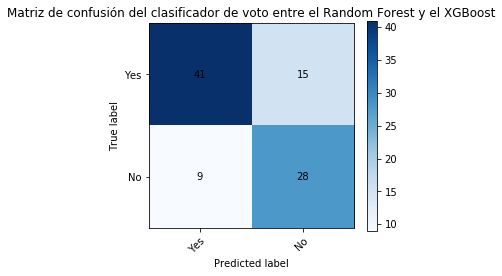

In [202]:
clf_votting_v2.fit(X_train_upgrade, y_train_upgrade)
y_pred_vot=clf_votting_v2.predict(X_test_upgrade)
classes = ['Yes', 'No']
plot_confusion_matrix(y_test_upgrade, y_pred_vot, classes=classes, title='Matriz de confusión del clasificador de voto entre el Random Forest y el XGBoost')

In [203]:
print (classification_report(y_test_upgrade, y_pred_vot, target_names=classes))
print (accuracy_score(y_test_upgrade, y_pred_vot))

              precision    recall  f1-score   support

         Yes       0.82      0.73      0.77        56
          No       0.65      0.76      0.70        37

    accuracy                           0.74        93
   macro avg       0.74      0.74      0.74        93
weighted avg       0.75      0.74      0.74        93

0.7419354838709677


Como último intento, vamos a intentar juntar los tres clasificadores en uno solo, para comprobar los resultados que obtenemos. Como podemos ver, se sigue notando una mejoría, pero seguimos sin superar el 76,35 % del accuracy obtenido con el XGBoost

In [0]:
clf_votting_v3 = VotingClassifier(estimators=[('xgboost', XGBClassifier(learning_rate = 0.16, max_depth = 2, n_estimators = 130)), 
                                           ('rf', RandomForestClassifier(min_samples_leaf = 1, max_depth = 9, n_estimators = 180)),
                                           ('gbt', ensemble.GradientBoostingClassifier(max_depth = 3, max_leaf_nodes = 5, min_samples_leaf = 3, n_estimators = 1200))])

In [285]:
cross_val_score(clf_votting_v3, x_upgrade, y, cv = 10, scoring = make_scorer(classification_report_with_accuracy_score)).mean()

              precision    recall  f1-score   support

          No       0.69      0.78      0.73        23
         Yes       0.76      0.67      0.71        24

    accuracy                           0.72        47
   macro avg       0.73      0.72      0.72        47
weighted avg       0.73      0.72      0.72        47

              precision    recall  f1-score   support

          No       0.76      0.70      0.73        23
         Yes       0.72      0.78      0.75        23

    accuracy                           0.74        46
   macro avg       0.74      0.74      0.74        46
weighted avg       0.74      0.74      0.74        46

              precision    recall  f1-score   support

          No       0.86      0.78      0.82        23
         Yes       0.80      0.87      0.83        23

    accuracy                           0.83        46
   macro avg       0.83      0.83      0.83        46
weighted avg       0.83      0.83      0.83        46

              preci

0.7527752081406106

Confusion matrix, without normalization
[[40 16]
 [ 7 30]]


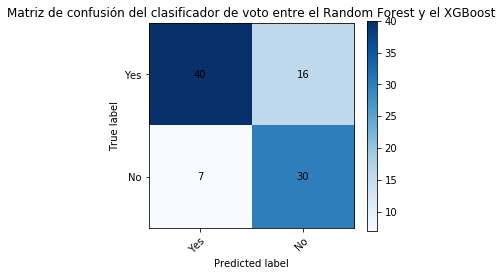

In [286]:
clf_votting_v3.fit(X_train_upgrade, y_train_upgrade)
y_pred_vot=clf_votting_v3.predict(X_test_upgrade)
classes = ['Yes', 'No']
plot_confusion_matrix(y_test_upgrade, y_pred_vot, classes=classes, title='Matriz de confusión del clasificador de voto entre el Random Forest y el XGBoost')

In [287]:
print (classification_report(y_test_upgrade, y_pred_vot, target_names=classes))
print (accuracy_score(y_test_upgrade, y_pred_vot))

              precision    recall  f1-score   support

         Yes       0.85      0.71      0.78        56
          No       0.65      0.81      0.72        37

    accuracy                           0.75        93
   macro avg       0.75      0.76      0.75        93
weighted avg       0.77      0.75      0.76        93

0.7526881720430108


### Bagging

Una vez hemos terminado de probar modelos, vamos a tratar de mejorar el Decision Tree con la técnica del Bagging. Como podemos ver, mejoramos un poco los resultados obtenidos pero sin llegar a los resultados obtenidos por el Random Forest ni, por supuesto, por el XGBoost.

In [288]:
clf_dt.best_params_

{'max_depth': 7, 'min_samples_leaf': 13}

In [0]:
clf_xbg_bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf = 7, max_depth = 13), n_estimators=100, oob_score =True)

In [290]:
cross_val_score(clf_xbg_bag, x_upgrade, y, cv = 10, scoring = make_scorer(classification_report_with_accuracy_score)).mean()

              precision    recall  f1-score   support

          No       0.68      0.74      0.71        23
         Yes       0.73      0.67      0.70        24

    accuracy                           0.70        47
   macro avg       0.70      0.70      0.70        47
weighted avg       0.70      0.70      0.70        47

              precision    recall  f1-score   support

          No       0.76      0.70      0.73        23
         Yes       0.72      0.78      0.75        23

    accuracy                           0.74        46
   macro avg       0.74      0.74      0.74        46
weighted avg       0.74      0.74      0.74        46

              precision    recall  f1-score   support

          No       0.79      0.83      0.81        23
         Yes       0.82      0.78      0.80        23

    accuracy                           0.80        46
   macro avg       0.80      0.80      0.80        46
weighted avg       0.80      0.80      0.80        46

              preci

0.7376040703052729

### Deep Learning

Con las nociones aprendidas durante el curso, vamos a intentar implementar una red neuronal capaz de superar los resultados obtenidos por el XGBoost, sin llegar a producir overfitting.

In [204]:
x_upgrade.shape

(461, 8)

In [0]:
x_upgrade

Vamos a normalizar los datos de nuestro dataset para que sean más sencillos de tratar para nuestra red

In [206]:
x_upgrade.columns

Index(['Max Depth', 'Max Curve', 'Max Variation Curve', 'Age', 'K Max',
       'Paqui Min', 'Distance Between Max Curve and Min Paqui',
       'Position of Most Curve Point Relative to Center'],
      dtype='object')

In [207]:
x_upgrade['Max Depth Norm'] = x_upgrade['Max Depth'] / x_upgrade['Max Depth'].max()
x_upgrade['Max Curve Norm'] = x_upgrade['Max Curve'] / x_upgrade['Max Curve'].max()
x_upgrade['Max Variation Curve Norm'] = x_upgrade['Max Variation Curve'] / x_upgrade['Max Variation Curve'].max()
x_upgrade['Age Norm'] = x_upgrade['Age'] / x_upgrade['Age'].max()
x_upgrade['K Max Norm'] = x_upgrade['K Max'] / x_upgrade['K Max'].max()
x_upgrade['Paqui Min Norm'] = x_upgrade['Paqui Min'] / x_upgrade['Paqui Min'].max()
x_upgrade['Distance Between Max Curve and Min Paqui Norm'] = x_upgrade['Distance Between Max Curve and Min Paqui'] / x_upgrade['Distance Between Max Curve and Min Paqui'].max()
x_upgrade['Position of Most Curve Point Relative to Center Norm'] = x_upgrade['Position of Most Curve Point Relative to Center'] / x_upgrade['Position of Most Curve Point Relative to Center'].max()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
x_upgrade_dl = x_upgrade[['Max Depth Norm', 'Max Curve Norm', 'Max Variation Curve Norm', 'Age Norm', 'K Max Norm', 'Paqui Min Norm', 'Distance Between Max Curve and Min Paqui Norm', 'Position of Most Curve Point Relative to Center Norm']]

In [0]:
x_train_list = x_upgrade_dl.values
y_cat = y_dl.values
y_list = y_dl.values
y_cat = utils.to_categorical(y_cat)

Vamos a utilizar esta función enseñada durante el curso para ir comprobando los resultados que vamos obteniendo

In [0]:
def plot_metric(history, metric):
    history_dict = history.history
    values = history_dict[metric]
    if 'val_' + metric in history_dict.keys():  
        val_values = history_dict['val_' + metric]

    epochs = range(1, len(values) + 1)

    if 'val_' + metric in history_dict.keys():  
        plt.plot(epochs, val_values, label='Validation')
    plt.semilogy(epochs, values, label='Training')

    if 'val_' + metric in history_dict.keys():  
        plt.title('Training and validation %s' % metric)
    else:
        plt.title('Training %s' % metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid()

    plt.show()  

Vamos a intentar crear una red neuronal sencilla para observar los resultados obtenidos

In [0]:
def build_model():
  m = models.Sequential()
  m.add(layers.Dense(32, input_shape = (8, ), activation='relu'))
  m.add(layers.Dense(16, activation='relu'))
  m.add(layers.Dense(2, activation='softmax'))
  return m

In [215]:
model = build_model()

W0616 17:54:58.432621 139859853621120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0616 17:54:58.479238 139859853621120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0616 17:54:58.487771 139859853621120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [216]:
model.compile(
    optimizer=optimizers.rmsprop(),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]   
    )

W0616 17:55:01.445647 139859853621120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0616 17:55:01.458747 139859853621120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [217]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 34        
Total params: 850
Trainable params: 850
Non-trainable params: 0
_________________________________________________________________


In [218]:
h = model.fit(x_train_list, y_cat, epochs=40, batch_size=10, validation_split=.2)

W0616 17:55:06.931737 139859853621120 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0616 17:55:06.996841 139859853621120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 368 samples, validate on 93 samples
Epoch 1/40
368/368 [==============================] - 4s 11ms/step - loss: 0.6630 - categorical_accuracy: 0.6277 - val_loss: 0.9856 - val_categorical_accuracy: 0.0000e+00
Epoch 2/40
368/368 [==============================] - 0s 352us/step - loss: 0.6550 - categorical_accuracy: 0.6277 - val_loss: 0.9091 - val_categorical_accuracy: 0.0000e+00
Epoch 3/40
368/368 [==============================] - 0s 368us/step - loss: 0.6513 - categorical_accuracy: 0.6277 - val_loss: 0.9280 - val_categorical_accuracy: 0.0000e+00
Epoch 4/40
368/368 [==============================] - 0s 335us/step - loss: 0.6458 - categorical_accuracy: 0.6277 - val_loss: 0.9031 - val_categorical_accuracy: 0.0000e+00
Epoch 5/40
368/368 [==============================] - 0s 348us/step - loss: 0.6430 - categorical_accuracy: 0.6277 - val_loss: 0.9047 - val_categorical_accuracy: 0.0000e+00
Epoch 6/40
368/368 [==============================] - 0s 395us/step - loss: 0.6375 - categorical

Como podemos ver, con esta red sencilla no nos acercamos nada a los resultados obtenidos por el XGBoost.

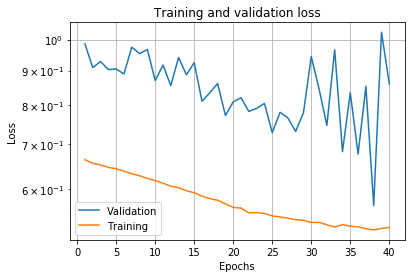

In [219]:
plot_metric(h, 'loss')

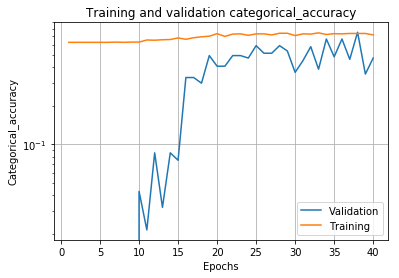

In [220]:
plot_metric(h, 'categorical_accuracy')

Vamos a jugar un poco con la configuración del entrenamiento para conseguir encontrar la configuración más idonea.

Train on 368 samples, validate on 93 samples
Epoch 1/160
368/368 [==============================] - 0s 1ms/step - loss: 0.6542 - categorical_accuracy: 0.6277 - val_loss: 0.8875 - val_categorical_accuracy: 0.0000e+00
Epoch 2/160
368/368 [==============================] - 0s 692us/step - loss: 0.6404 - categorical_accuracy: 0.6277 - val_loss: 0.9078 - val_categorical_accuracy: 0.0000e+00
Epoch 3/160
368/368 [==============================] - 0s 710us/step - loss: 0.6259 - categorical_accuracy: 0.6250 - val_loss: 1.0745 - val_categorical_accuracy: 0.0000e+00
Epoch 4/160
368/368 [==============================] - 0s 687us/step - loss: 0.6173 - categorical_accuracy: 0.6277 - val_loss: 0.9424 - val_categorical_accuracy: 0.0108
Epoch 5/160
368/368 [==============================] - 0s 784us/step - loss: 0.6035 - categorical_accuracy: 0.6549 - val_loss: 1.0582 - val_categorical_accuracy: 0.0000e+00
Epoch 6/160
368/368 [==============================] - 0s 665us/step - loss: 0.5952 - categorica

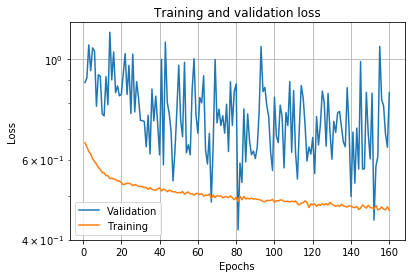

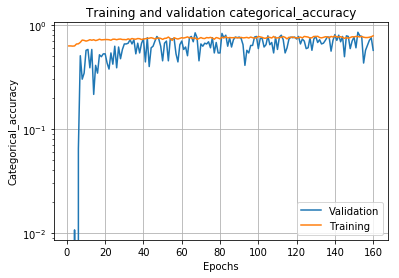

In [221]:
model = build_model()
model.compile(
    optimizer=optimizers.rmsprop(),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]   
    )
h = model.fit(x_train_list, y_cat, epochs=160, batch_size=5, validation_split=.2)
plot_metric(h, 'loss')
plot_metric(h, 'categorical_accuracy')

Podemos ver que con un optimizador adam nuestra red funciona mejor.

Train on 368 samples, validate on 93 samples
Epoch 1/160
368/368 [==============================] - 1s 1ms/step - loss: 0.6585 - categorical_accuracy: 0.6277 - val_loss: 0.8723 - val_categorical_accuracy: 0.0000e+00
Epoch 2/160
368/368 [==============================] - 0s 645us/step - loss: 0.6417 - categorical_accuracy: 0.6223 - val_loss: 1.0632 - val_categorical_accuracy: 0.0000e+00
Epoch 3/160
368/368 [==============================] - 0s 642us/step - loss: 0.6397 - categorical_accuracy: 0.6277 - val_loss: 1.0060 - val_categorical_accuracy: 0.0000e+00
Epoch 4/160
368/368 [==============================] - 0s 658us/step - loss: 0.6255 - categorical_accuracy: 0.6277 - val_loss: 0.9387 - val_categorical_accuracy: 0.0000e+00
Epoch 5/160
368/368 [==============================] - 0s 641us/step - loss: 0.6139 - categorical_accuracy: 0.6304 - val_loss: 0.8776 - val_categorical_accuracy: 0.0645
Epoch 6/160
368/368 [==============================] - 0s 659us/step - loss: 0.6041 - categorica

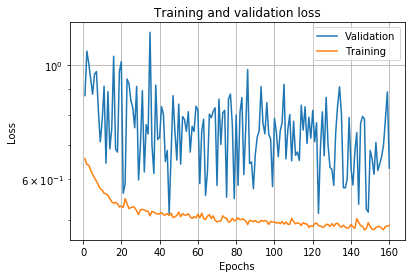

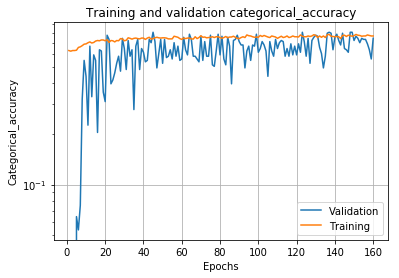

In [222]:
model = build_model()
model.compile(
    optimizer=optimizers.adam(),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]   
    )
h = model.fit(x_train_list, y_cat, epochs=160, batch_size=5, validation_split=.2)
plot_metric(h, 'loss')
plot_metric(h, 'categorical_accuracy')

En este punto, vamos a intentar modificar la configuración de la red para mejorar los resultados

In [0]:
def build_model():
  m = models.Sequential()
  m.add(layers.Dense(32, input_dim = 8, kernel_initializer='normal', activation='relu'))
  m.add(layers.Dense(16, kernel_initializer='normal', activation='relu'))
  #m.add(layers.Dense(8, kernel_initializer='normal', activation='relu'))
  #m.add(layers.Dropout(0.1))
  m.add(layers.Dense(2, kernel_initializer='normal', activation='sigmoid'))
  return m

Train on 368 samples, validate on 93 samples
Epoch 1/300
368/368 [==============================] - 1s 2ms/step - loss: 0.6879 - categorical_accuracy: 0.6250 - val_loss: 0.7707 - val_categorical_accuracy: 0.0000e+00
Epoch 2/300
368/368 [==============================] - 0s 726us/step - loss: 0.6696 - categorical_accuracy: 0.6277 - val_loss: 0.9229 - val_categorical_accuracy: 0.0000e+00
Epoch 3/300
368/368 [==============================] - 0s 742us/step - loss: 0.6624 - categorical_accuracy: 0.6277 - val_loss: 0.9991 - val_categorical_accuracy: 0.0000e+00
Epoch 4/300
368/368 [==============================] - 0s 732us/step - loss: 0.6596 - categorical_accuracy: 0.6277 - val_loss: 0.9544 - val_categorical_accuracy: 0.0000e+00
Epoch 5/300
368/368 [==============================] - 0s 755us/step - loss: 0.6578 - categorical_accuracy: 0.6277 - val_loss: 0.9891 - val_categorical_accuracy: 0.0000e+00
Epoch 6/300
368/368 [==============================] - 0s 709us/step - loss: 0.6562 - catego

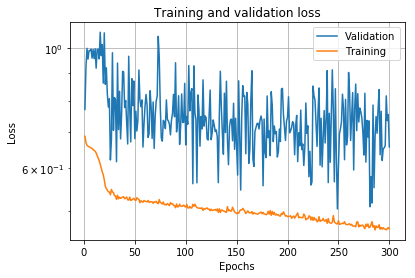

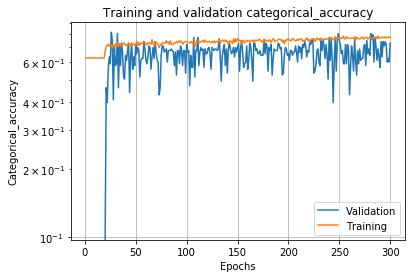

In [224]:
model = build_model()
model.compile(
    optimizer=optimizers.adam(),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]   
    )
h = model.fit(x_train_list, y_cat, epochs=300, batch_size=5, validation_split=.2)
plot_metric(h, 'loss')
plot_metric(h, 'categorical_accuracy')

Viendo que no somos capaces de mejorar los resultados, vamos a intentar modificar los datos de entrada. Vamos a probar con estandarizar las escalas de los datos de entrada.

In [225]:
x_upgrade.columns

Index(['Max Depth', 'Max Curve', 'Max Variation Curve', 'Age', 'K Max',
       'Paqui Min', 'Distance Between Max Curve and Min Paqui',
       'Position of Most Curve Point Relative to Center', 'Max Depth Norm',
       'Max Curve Norm', 'Max Variation Curve Norm', 'Age Norm', 'K Max Norm',
       'Paqui Min Norm', 'Distance Between Max Curve and Min Paqui Norm',
       'Position of Most Curve Point Relative to Center Norm'],
      dtype='object')

In [0]:
sc = StandardScaler()
x_upgrade.drop(['Max Depth Norm', 'Max Curve Norm', 'Max Variation Curve Norm', 'Age Norm', 'K Max Norm',
       'Paqui Min Norm', 'Distance Between Max Curve and Min Paqui Norm',
       'Position of Most Curve Point Relative to Center Norm'], axis = 1, inplace = True)
x_SC = sc.fit_transform(x_upgrade.values)

In [227]:
x_SC

array([[-0.47709115, -0.16020906,  0.08537577, ..., -0.8518976 ,
        -0.53159119, -0.42837659],
       [-1.05694136, -0.07357401, -0.05739278, ..., -0.93827718,
        -0.70794347, -0.52155534],
       [-0.02580502, -1.67632237,  1.01337129, ..., -1.30539043,
         2.4737456 ,  2.12328765],
       ...,
       [ 0.88988604,  0.61950636, -0.34292986, ...,  0.57336559,
        -0.28175879,  0.22387466],
       [-0.37214089, -0.3046008 , -0.20016132, ...,  1.8042747 ,
        -0.80346762, -0.84409717],
       [ 0.82691588, -0.18908741,  0.67174656, ...,  0.29263193,
        -0.24501873,  0.46757293]])

Vamos a separar las muestras en train y test, para realizar las comprobaciones necesarias posteriormente.

In [0]:
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(x_SC, y_list, test_size=0.3)

In [229]:
X_train_dl.shape

(322, 8)

In [0]:
def build_model():
  m = models.Sequential()
  m.add(layers.Dense(4, input_dim = 8, activation='relu'))
  m.add(layers.Dense(4, activation='relu'))
  #m.add(layers.Dense(8, kernel_initializer='normal', activation='relu'))
  #m.add(layers.Dropout(0.1))
  m.add(layers.Dense(1, activation='sigmoid'))
  return m

Train on 257 samples, validate on 65 samples
Epoch 1/100
257/257 [==============================] - 2s 6ms/step - loss: 0.6832 - binary_accuracy: 0.5992 - val_loss: 0.6653 - val_binary_accuracy: 0.6308
Epoch 2/100
257/257 [==============================] - 0s 859us/step - loss: 0.6764 - binary_accuracy: 0.6265 - val_loss: 0.6617 - val_binary_accuracy: 0.6308
Epoch 3/100
257/257 [==============================] - 0s 841us/step - loss: 0.6699 - binary_accuracy: 0.6342 - val_loss: 0.6559 - val_binary_accuracy: 0.6462
Epoch 4/100
257/257 [==============================] - 0s 762us/step - loss: 0.6627 - binary_accuracy: 0.6420 - val_loss: 0.6520 - val_binary_accuracy: 0.6462
Epoch 5/100
257/257 [==============================] - 0s 807us/step - loss: 0.6550 - binary_accuracy: 0.6420 - val_loss: 0.6475 - val_binary_accuracy: 0.6462
Epoch 6/100
257/257 [==============================] - 0s 738us/step - loss: 0.6476 - binary_accuracy: 0.6576 - val_loss: 0.6419 - val_binary_accuracy: 0.6462
Epo

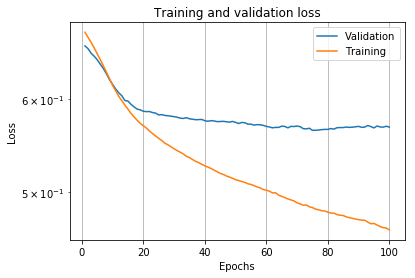

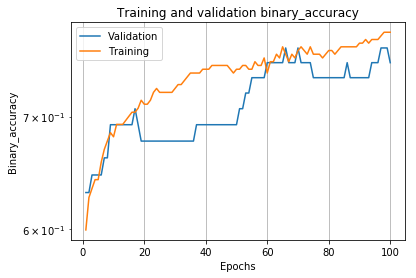

In [261]:
model = build_model()
model.compile(
    optimizer=optimizers.adam(),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy]   
    )
h = model.fit(X_train_dl, y_train_dl, epochs=100, batch_size=5, validation_split=.2)
plot_metric(h, 'loss')
plot_metric(h, 'binary_accuracy')

In [262]:
eval_model=model.evaluate(X_train_dl, y_train_dl)
eval_model

322/322 [==============================] - 0s 79us/step


[0.48428134888595675, 0.782608695652174]

Vamos a comprobar los resultados obtenidos en la red neuronal y mostrarla en una matriz de confusión. Como podemos observar, con el conjunto de test obtenemos un accuracy de 0.72 y una precisión de 0.71.

In [265]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_53 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 5         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [263]:
y_pred_dl=model.predict(X_test_dl)
y_pred_dl =(y_pred_dl>0.5)
cm = confusion_matrix(y_test_dl, y_pred_dl)
print(cm)

[[53 19]
 [17 50]]


In [267]:
Accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[1][1] + cm[1][0] + cm[0][1])
print ("El accuracy es " + str(Accuracy))
Precission = (cm[0][0]) / (cm[0][0] + cm[0][1])
print ("La precisión es " + str(Precission))
Precission_2 = (cm[1][1]) / (cm[1][1] + cm[1][0])
print ("La precisión es " + str(Precission_2))

El accuracy es 0.7410071942446043
La precisión es 0.7361111111111112
La precisión es 0.746268656716418


Para hacer una comprobación final, vamos a entrenar el XGBoost con un train_test_split para compararlo con los resultado obtenidos con la red neuronal.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x_upgrade, y, test_size=0.3)

In [0]:
xgb_clas = GridSearchCV(XGBClassifier(),
                      param_grid = {'max_depth': np.arange(2,10),
                                   "learning_rate": np.arange(0.04, 0.32, 0.04),
                                   "n_estimators": np.arange(100, 150, 10)},
                      cv = 10,
                      scoring = 'accuracy',
                      n_jobs = -1
         )

In [270]:
xgb_clas.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': array([0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32]),
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])

In [272]:
y_result = xgb_clas.best_estimator_.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_result)
print(cm_xgb)

[[55 19]
 [17 48]]


Como se puede observar, en una prueba real las métricas del XGBoost bajan debido a que se ha producido cierto OverFitting durante el entrenamiento.

In [273]:
Accuracy = (cm_xgb[0][0] + cm_xgb[1][1]) / (cm_xgb[0][0] + cm_xgb[1][1] + cm_xgb[1][0] + cm_xgb[0][1])
print ("El accuracy es " + str(Accuracy))
Precission = (cm_xgb[0][0]) / (cm_xgb[0][0] + cm_xgb[0][1])
print ("La precisión es " + str(Precission))

El accuracy es 0.7410071942446043
La precisión es 0.7432432432432432
